In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import pandas as pd
raw=pd.read_csv('MajorDatasetDischarge.csv')
pd.set_option('display.max_colwidth', None)

In [ ]:
#Concatenation of documents
# concatenate documents
grouped = raw.groupby('subject_id')

concatenated_documents = []
for group_name, group in grouped:
    concatenated_document = ' '.join(group['text'].tolist())
    concatenated_documents.append({'subject_id': group_name, 'text': concatenated_document})

raw = pd.DataFrame(concatenated_documents)

In [ ]:
import nltk
from nltk.tokenize import sent_tokenize

def remove_redundant_sentences(df):
    # Concatenate all the documents in the group
    concatenated_document = ' '.join(df['text'].tolist())

    # Tokenize the concatenated document into sentences
    sentences = sent_tokenize(concatenated_document)

    # Remove duplicate sentences
    unique_sentences = set(sentences)

    # Concatenate the unique sentences into a single document
    unique_document = ' '.join(unique_sentences)
    # Return a new DataFrame with the unique document
    return pd.DataFrame({'subject_id': [df['subject_id'].iloc[0]], 'text': [unique_document]})

In [ ]:
raw = raw.groupby('subject_id').apply(remove_redundant_sentences)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
raw = raw.groupby('subject_id').apply(remove_redundant_sentences)

In [ ]:
pd.set_option('display.max_colwidth', None)
raw.head(5)

Unnamed: 0  subject_id  \
0           0    10000032   
1           1    10000084   
2           2    10000117   
3           3    10000248   
4           4    10000560   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
raw=raw.drop(columns=['Unnamed: 0' ])

In [ ]:
raw=raw.head(50000)

In [ ]:
raw.shape

(50000, 2)

#Visualise data

In [ ]:
subject_id_min = raw['subject_id'].min()
subject_id_max = raw['subject_id'].max()
print(subject_id_min)
print(subject_id_max)

10000032
13449593


In [ ]:
unique_counts = raw['subject_id'].nunique()


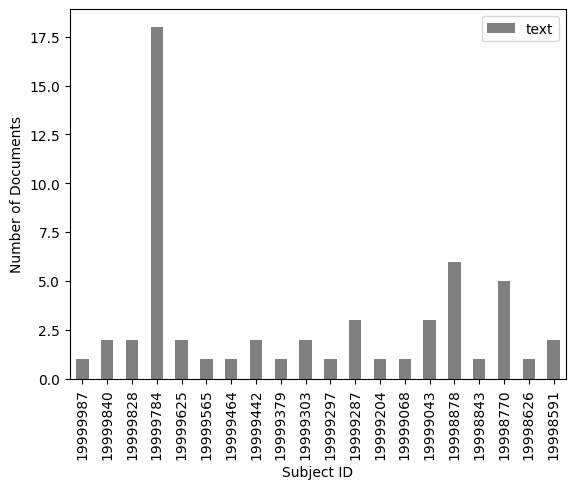

In [ ]:
document_counts = raw.groupby('subject_id').count()
top_counts = document_counts.sort_values(by='subject_id', ascending=False).head(20)
top_counts.plot(kind='bar', color='#EE6E9C')
plt.xlabel('Subject ID')
plt.ylabel('Number of Documents')
#plt.title('Number of Documents per Subject ID (Top 20)')
plt.show()



### Preprocessing

In [ ]:
raw['text'] = raw['text'].replace('\n', ' ', regex=True)
raw['text'] = raw['text'].replace('_', ' ', regex=True)
raw['text'] =raw['text'].replace('=', ' ', regex=True)

In [ ]:
import re
def preprocess_text(text):
    # Remove the sentence from start of text
    prefix = 'Name: Unit No: Admission Date: Discharge Date: Date of Birth: '
    #if text.startswith(prefix):
        #text = text[len(prefix):].strip()
    text = text.replace(prefix, '').strip()
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    #text = " ".join(text.split())
    # Remove special characters
    #text = re.sub('[^A-Za-z0-9 ./ :/]+', '', text)
    text = re.sub('[^A-Za-z0-9 ./:/ ]+', ' ', text)
    #text = re.sub('[^A-Za-z0-9 ./,:-]+', ' ', text)


    #text = re.sub('[^A-Za-z0-9 /]+', '', text)
    #text=text.lower()
    return text
raw['text'] = raw['text'].apply(preprocess_text)
raw['text'].head(5)

0    Sex: F Service: MEDICINE Allergies: No Known Allergies / Adverse Drug Reactions Attending: Chief Complaint: Worsening ABD distension and pain Major Surgical or Invasive Procedure: Paracentesis History of Present Illness: HCV cirrhosis c/b ascites hiv on ART h/o IVDU COPD bioplar PTSD presented from OSH ED with worsening abd distension over past week. Pt reports self discontinuing lasix and spirnolactone weeks ago because she feels like they don t do anything and that she doesn t want to put more chemicals in her. She does not follow Na restricted diets. In the past week she notes that she has been having worsening abd distension and discomfort. She denies edema or SOB or orthopnea. She denies f/c/n/v d/c dysuria. She had food poisoning a week ago from eating stale cake n/v 20 min after food ingestion which resolved the same day. She denies other recent illness or sick contacts. She notes that she has been noticing gum bleeding while brushing her teeth in recent weeks. she denies e

In [ ]:
import re

# Remove non-alphabetic characters (Data Cleaning)
def text_strip(column):
    #prefix = 'name unit admission date discharge date date birth'
    #column = column.replace(prefix, '').strip()
    for row in column:
    # Remove . if it occurs more than one time consecutively
        row = re.sub("(\.  \.+)", " ", str(row)).lower()

        # Remove the characters - <>()|&©ø"',;?~*!
        row = re.sub(r"[<>()|&©ø\[\]\'\",;?=~*!]", " ", str(row)).lower()
        row = re.sub(r"\s+", " ", row).strip()

        # Remove _ if it occurs more than one time consecutively
        row = re.sub("(__+)", " ", str(row)).lower()

        # Remove - if it occurs more than one time consecutively
        row = re.sub("(--+)", " ", str(row)).lower()
        #Remove ==
        row=re.sub("==+", " ", str(row)).lower()

        # Remove multiple spaces
        row = re.sub("(\s+)", " ", str(row)).lower()
        row = re.sub(r"\s+", " ", row).strip()

        # Remove the single character hanging between any two spaces
        row = re.sub("(\s+.\s+)", " ", str(row)).lower()
    yield row

processed_text = text_strip(raw['text'])
print(raw.head(2))

   subject_id  \
0    10000032   
1    10000084   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [ ]:
raw.head(1)

subject_id  \
0    10000032   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [ ]:
import spacy
from time import time

nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

# Process text as batches and yield Doc objects in order
text = [str(doc) for doc in nlp.pipe(processed_text, batch_size=5000)]

In [ ]:
raw.shape

(331794, 8)

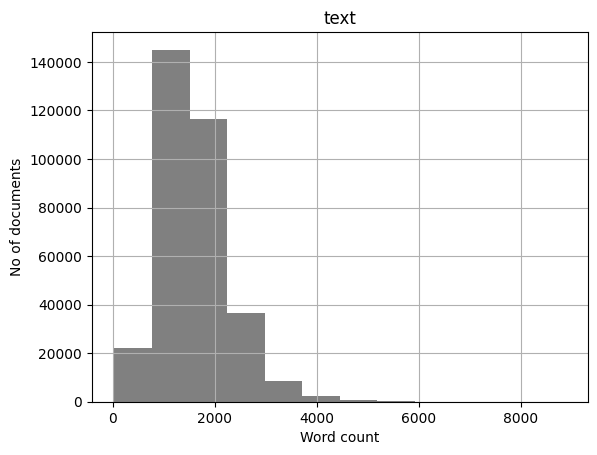

In [ ]:
import matplotlib.pyplot as plt

text_count = []

for sent in raw['text']:
    text_count.append(len(sent.split()))


graph_df = pd.DataFrame()

graph_df['text'] = text_count

graph_df.hist(bins = 12, color='gray')
plt.ylabel('No of documents')
plt.xlabel("Word count")
plt.show()

In [ ]:
# Check how much % of text have 0-5000 words
cnt = 0
for i in raw['text']:
    if len(i.split()) <= 5000:
        cnt = cnt + 1
print(cnt / len(raw['text']))

0.82328


In [ ]:
# Model to summarize the text between 0-500 words for Text
max_text_len = 5000
max_summary_len=500

In [ ]:
# Select the Text which fall below max length

import numpy as np

cleaned_text = np.array(raw['text'])

short_text = []

for i in range(len(cleaned_text)):
    if len(cleaned_text[i].split()) <= max_text_len:
        short_text.append(cleaned_text[i])

post_pre = pd.DataFrame({'text': short_text})
print(post_pre.shape)

(41164, 1)
